In [1]:
# Section 2, cloth defect detection
# by 212138-卓旭

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from helper import Gabor
from PIL import Image
import cv2

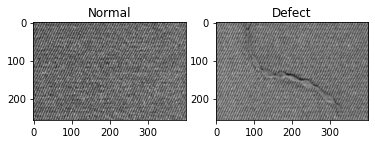

In [3]:
normal = np.array(Image.open('./materials/normal.bmp'), dtype=np.uint8).astype(np.float32)
defect = np.array(Image.open('./materials/defect.bmp'), dtype=np.uint8).astype(np.float32)
plt.figure()
plt.subplot(121); plt.imshow(normal, cmap='gray'); plt.title('Normal')
plt.subplot(122); plt.imshow(defect, cmap='gray'); plt.title('Defect')
plt.show()

In [4]:
def Otsu(img):
    x = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    return x[1]

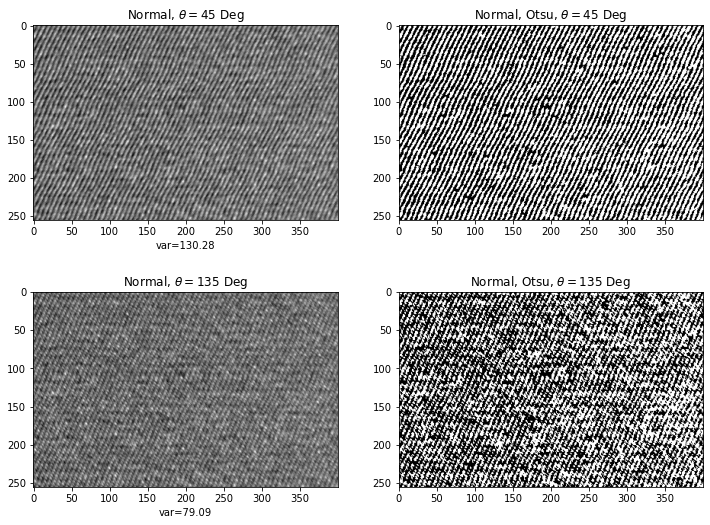

In [5]:
plt.figure(figsize=(12, 9))
for i, theta in enumerate([45, 135]):
    g = Gabor(0.5, np.radians(theta), 2, 0, 0.5, ksize=9)
    normalFiltered = cv2.filter2D(normal, None, g)
    plt.subplot(2, 2, i * 2 + 1)
    plt.imshow(normalFiltered, cmap='gray'); plt.title(r'Normal, $\theta=${} Deg'.format(theta))
    plt.xlabel('var={:.2f}'.format(normalFiltered.var()))
    plt.subplot(2, 2, (i * 2 + 1) + 1)
    plt.imshow(Otsu(normalFiltered), cmap='gray'); plt.title(r'Normal, Otsu, $\theta=${} Deg'.format(theta))
plt.show()

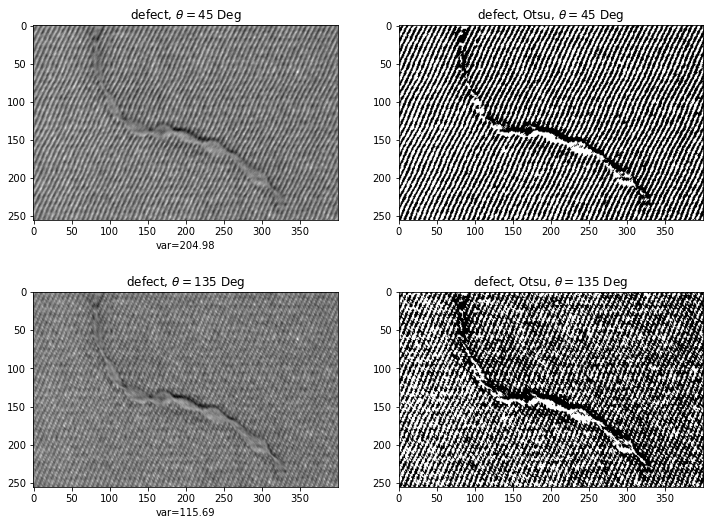

In [6]:
plt.figure(figsize=(12, 9))
for i, theta in enumerate([45, 135]):
    g = Gabor(0.5, np.radians(theta), 2, 0, 0.5, ksize=9)
    defectFiltered = cv2.filter2D(defect, None, g)
    plt.subplot(2, 2, i * 2 + 1)
    plt.imshow(defectFiltered, cmap='gray'); plt.title(r'defect, $\theta=${} Deg'.format(theta))
    plt.xlabel('var={:.2f}'.format(defectFiltered.var()))
    plt.subplot(2, 2, (i * 2 + 1) + 1)
    plt.imshow(Otsu(defectFiltered), cmap='gray'); plt.title(r'defect, Otsu, $\theta=${} Deg'.format(theta))
plt.show()